In [5]:
from tensorflow.keras.datasets import reuters

In [6]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = num_words)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(8982,) (8982,)
(2246,) (2246,)


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_x_train = pad_sequences(x_train, maxlen = max_len)
pad_x_test = pad_sequences(x_test, maxlen = max_len)

print(len(pad_x_train[0]))

500


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [11]:
model = Sequential()

In [12]:
model.add(Embedding(input_dim = num_words, output_dim = 64))
model.add(LSTM(64, return_sequences= True))
model.add(LSTM(32))
model.add(Dense(46, activation= 'softmax'))

In [13]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [15]:
history = model.fit(pad_x_train, y_train,
                    batch_size = 32,
                    epochs = 20,
                    validation_split = 0.2)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 58s 246ms/step - acc: 0.3202 - loss: 2.7988 - val_acc: 0.3450 - val_loss: 2.3696
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 55s 242ms/step - acc: 0.4143 - loss: 2.2372 - val_acc: 0.5370 - val_loss: 1.8317
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 58s 259ms/step - acc: 0.5359 - loss: 1.7702 - val_acc: 0.5359 - val_loss: 1.7395
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 55s 243ms/step - acc: 0.5570 - loss: 1.6688 - val_acc: 0.5671 - val_loss: 1.6786
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 52s 229ms/step - acc: 0.5877 - loss: 1.5561 - val_acc: 0.5771 - val_loss: 1.6279
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 52s 233ms/step - acc: 0.5948 - loss: 1.5330 - val_acc: 0.5459 - val_loss: 1.6489
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 52s 230ms/step - acc: 0.6121 - loss: 1.4338 - val_acc: 0.5965 - val_loss: 1.5644
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 52s 231ms/step - acc: 0.6521 - loss: 1.3022 - val_acc: 0.5932 - val_loss: 1.5635
Epoch 9/20
225/225 ━━━━━━━━━━━━━

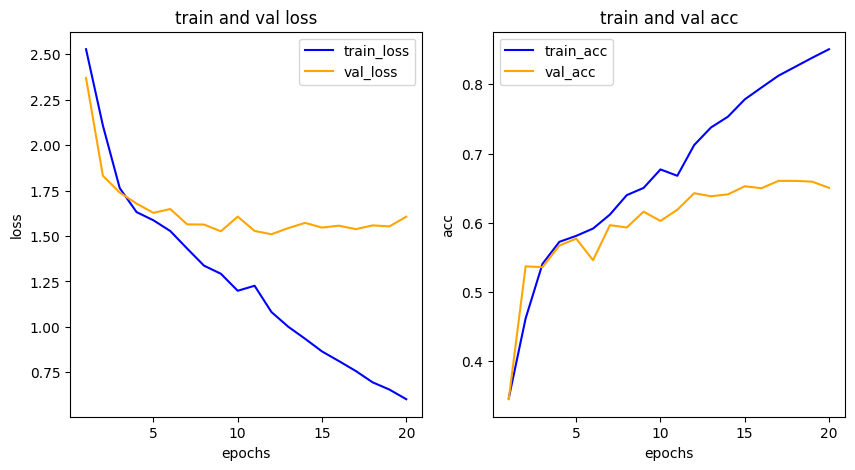

In [16]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()